 1. Install and Import Necessary Libraries

In [1]:
#Importing necessary libraries
import pandas as pd #For Data Manipulation
import numpy as np # For numerical calculations wherever needed
import matplotlib.pyplot as plt #For Data Visualisation
import seaborn as sns #For Data Visualisation

Fetching Air Quality Data from UCS Repository directly

In [2]:
#Installing and importing UCS ML Repository
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# Fetching Air Quality Dataset from UCS ML Repository
air_quality = fetch_ucirepo(id=360)
X = air_quality.data.features
y = air_quality.data.targets

# Concatenating X,y into a single DataFrame
airq_df = pd.concat([X, y], axis=1)

In [3]:
# Checking the top 10 rows of the air quality dataframe
airq_df.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
5,3/10/2004,23:00:00,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848
6,3/11/2004,0:00:00,1.2,1185,31,3.6,690,62,1462,77,1333,733,11.3,56.8,0.7603
7,3/11/2004,1:00:00,1.0,1136,31,3.3,672,62,1453,76,1333,730,10.7,60.0,0.7702
8,3/11/2004,2:00:00,0.9,1094,24,2.3,609,45,1579,60,1276,620,10.7,59.7,0.7648
9,3/11/2004,3:00:00,0.6,1010,19,1.7,561,-200,1705,-200,1235,501,10.3,60.2,0.7517


We shall first see the basic info of various features in the dataset

In [4]:
#Checking the basic info of the air quality dataframe
print(airq_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB
None


There are no null values in the dataset. Next we will explore the distribution of the values in each of the colunns

In [5]:
# Checking the distribution of each column in the dataset
print(airq_df.describe())

            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
std     257.433866    321.993552   126.940455    467.210125   456.938184   
min    -200

We notice that -200 is present as minimum in all columns. This appears to be used as a substitution for missing values and hence we replace it with null for proper analysis

In [6]:
# We replace -200 with NA values across all columns in the dataset
airq_df.replace(-200, np.nan, inplace=True)

#Now we recheck the nulls % in each column after replacing -200 with NAs
airq_df.isnull().mean()*100

,0
Date,0.000000
Time,0.000000
CO(GT),17.986534
PT08.S1(CO),3.911510
NMHC(GT),90.231912
C6H6(GT),3.911510
PT08.S2(NMHC),3.911510
NOx(GT),17.516298
PT08.S3(NOx),3.911510
NO2(GT),17.548360


We see the missing values are now evident in the data after replacing -200. We shall categorize the null handling method based on null%

In [7]:
# We shall drop columns with more than 50% missing values
airq_df.drop(columns=['NMHC(GT)'], inplace=True)

# Next, we shall impute low missing data (<5%) using median imputation
low_missing_cols = ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
                    'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
for col in low_missing_cols:
    airq_df[col].fillna(airq_df[col].median(), inplace=True)

# Also, impute moderately missing data (10-20%) using mean imputation
moderate_missing_cols = ['CO(GT)', 'NOx(GT)', 'NO2(GT)']
for col in moderate_missing_cols:
    airq_df[col].fillna(airq_df[col].mean(), inplace=True)

# Finally check if all missing values are handled
print("Missing values after imputation:\n", airq_df.isna().sum())

Missing values after imputation:
 Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


<ipython-input-7-54d0ae1f590b>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airq_df[col].fillna(airq_df[col].median(), inplace=True)
<ipython-input-7-54d0ae1f590b>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

For simplicity, we combine date and time columns to create datetime column

In [8]:
# Convert 'Date' and 'Time' columns into a single datetime column
airq_df['Date_Time'] = pd.to_datetime(airq_df['Date'] + ' ' + airq_df['Time'], dayfirst=True, errors='coerce')

# Drop Original 'Date' and 'Time' Columns
airq_df.drop(columns=['Date', 'Time'], inplace=True)

#Checking first 10 rows after update date time columns
airq_df.head(10)

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Date_Time
0,2.6,1360.0,11.9,1046.0,166.000000,1056.0,113.000000,1692.0,1268.0,13.6,48.9,0.7578,2004-10-03 18:00:00
1,2.0,1292.0,9.4,955.0,103.000000,1174.0,92.000000,1559.0,972.0,13.3,47.7,0.7255,2004-10-03 19:00:00
2,2.2,1402.0,9.0,939.0,131.000000,1140.0,114.000000,1555.0,1074.0,11.9,54.0,0.7502,2004-10-03 20:00:00
3,2.2,1376.0,9.2,948.0,172.000000,1092.0,122.000000,1584.0,1203.0,11.0,60.0,0.7867,2004-10-03 21:00:00
4,1.6,1272.0,6.5,836.0,131.000000,1205.0,116.000000,1490.0,1110.0,11.2,59.6,0.7888,2004-10-03 22:00:00
5,1.2,1197.0,4.7,750.0,89.000000,1337.0,96.000000,1393.0,949.0,11.2,59.2,0.7848,2004-10-03 23:00:00
6,1.2,1185.0,3.6,690.0,62.000000,1462.0,77.000000,1333.0,733.0,11.3,56.8,0.7603,2004-11-03 00:00:00
7,1.0,1136.0,3.3,672.0,62.000000,1453.0,76.000000,1333.0,730.0,10.7,60.0,0.7702,2004-11-03 01:00:00
8,0.9,1094.0,2.3,609.0,45.000000,1579.0,60.000000,1276.0,620.0,10.7,59.7,0.7648,2004-11-03 02:00:00
9,0.6,1010.0,1.7,561.0,246.896735,1705.0,113.091251,1235.0,501.0,10.3,60.2,0.7517,2004-11-03 03:00:00


Finally we visually distribution of the each column through box plots and histograms

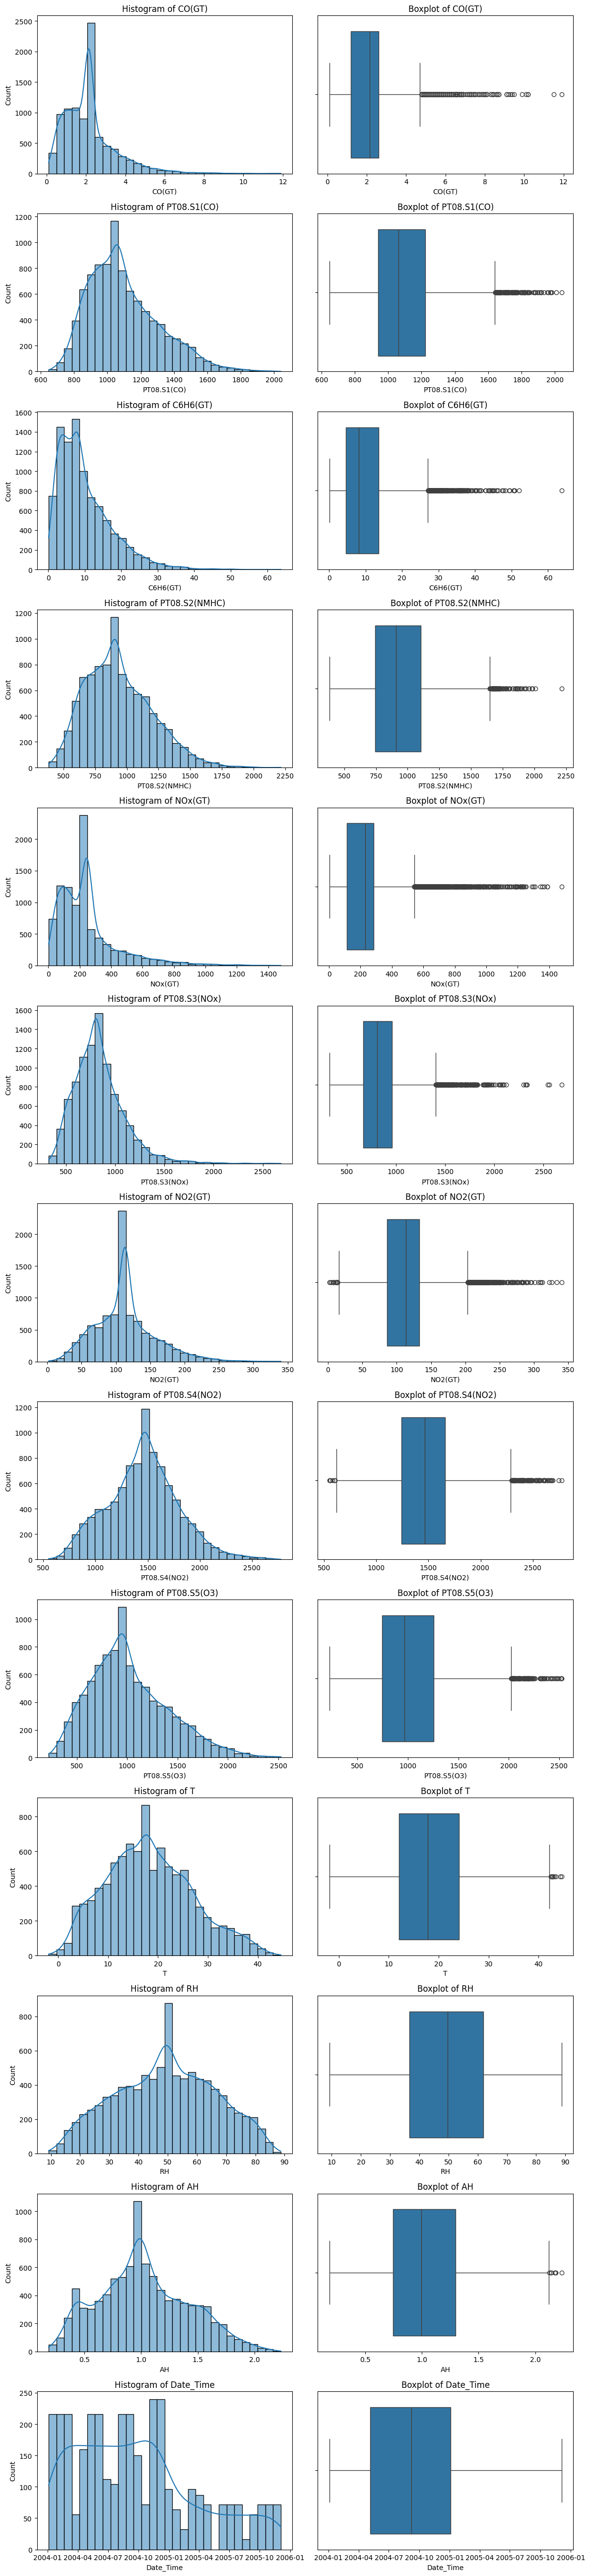

In [9]:
# Set the figure size
num_cols = len(airq_df.columns)
fig, axes = plt.subplots(nrows=num_cols, ncols=2, figsize=(12, 4 * num_cols))

# Iterate over each column and create histograms and boxplots
for i, col in enumerate(airq_df.columns):
    # Histogram
    sns.histplot(airq_df[col], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Histogram of {col}")

    # Boxplot
    sns.boxplot(x=airq_df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f"Boxplot of {col}")

# Adjust layout
plt.tight_layout()
plt.show()